In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

import yaml
from nnaps import predictors
from sklearn import metrics

pd.set_option('display.max_columns', None)

Using TensorFlow backend.


In [2]:
df = pd.read_csv('../data/sdBShortP_large_BPS_training_set_ce_applied.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8520 entries, 0 to 8519
Columns: 102 entries, Unnamed: 0 to product
dtypes: bool(3), float64(81), int64(10), object(8)
memory usage: 6.5+ MB


In [4]:
df['stability'].value_counts()

stable     4290
CE         2446
contact    1489
merger      295
Name: stability, dtype: int64

In [5]:
df_ce = df[df['stability'] == 'CE']
df_merger = df[df['stability'] == 'merger']
df_stable = df[(df['stability'] == 'stable')]
df_he = df_stable[df_stable['HeCoreBurning'] == 1]

## Predict pre interaction properties and stability

In [6]:
setup = """
features: 
    - M1_init
    - q_init
    - P_init
    - FeH_init
    - stability_limit
    - alpha_ce
regressors:
    MS_P:
        processor: StandardScaler
    MS_q:
        processor: StandardScaler
    MS_M1:
        processor: StandardScaler
    RGB_P:
        processor: StandardScaler
    RGB_q:
        processor: StandardScaler
    RGB_M1:
        processor: StandardScaler
    ML_P:
        processor: StandardScaler
    ML_q:
        processor: StandardScaler
    ML_M1:
        processor: StandardScaler
classifiers: 
    - stability
    - MS
    - RGB
    - ML
model:
   - {'layer':'Dense',   'args':[200], 'kwargs': {'activation':'relu', 'name':'FC_1'} }
   - {'layer':'Dense',   'args':[100], 'kwargs': {'activation':'relu', 'name':'FC_2'} }
   - {'layer':'Dense',   'args':[50],  'kwargs': {'activation':'relu', 'name':'FC_3'} }
optimizer: adam
"""
setup = yaml.safe_load(setup)
predictor_pre_interaction = predictors.FCPredictor(setup=setup, data=df)

In [7]:
predictor_pre_interaction.fit(epochs=100, batch_size=1024, reduce_lr=True)

Train on 6816 samples, validate on 1704 samples
Epoch 1/100
 - 4s - loss: 11.9105 - MS_P_loss: 0.9273 - MS_q_loss: 0.8868 - MS_M1_loss: 0.9743 - RGB_P_loss: 0.9370 - RGB_q_loss: 0.9644 - RGB_M1_loss: 0.9451 - ML_P_loss: 0.9095 - ML_q_loss: 0.9813 - ML_M1_loss: 0.9252 - stability_loss: 1.3450 - MS_loss: 0.6637 - RGB_loss: 0.7385 - ML_loss: 0.6483 - MS_P_mae: 0.7693 - MS_q_mae: 0.6250 - MS_M1_mae: 0.8462 - RGB_P_mae: 0.7671 - RGB_q_mae: 0.6285 - RGB_M1_mae: 0.8368 - ML_P_mae: 0.7452 - ML_q_mae: 0.6565 - ML_M1_mae: 0.8263 - stability_accuracy: 0.4051 - MS_accuracy: 0.7880 - RGB_accuracy: 0.2102 - ML_accuracy: 0.7306 - val_loss: 10.5785 - val_MS_P_loss: 0.8374 - val_MS_q_loss: 0.7216 - val_MS_M1_loss: 0.8160 - val_RGB_P_loss: 0.8887 - val_RGB_q_loss: 0.8626 - val_RGB_M1_loss: 0.8099 - val_ML_P_loss: 0.7427 - val_ML_q_loss: 0.8969 - val_ML_M1_loss: 0.7613 - val_stability_loss: 1.3175 - val_MS_loss: 0.6257 - val_RGB_loss: 0.6897 - val_ML_loss: 0.5721 - val_MS_P_mae: 0.7170 - val_MS_q_mae: 0.

Epoch 8/100
 - 0s - loss: 1.1051 - MS_P_loss: 0.0135 - MS_q_loss: 0.0142 - MS_M1_loss: 0.0120 - RGB_P_loss: 0.0157 - RGB_q_loss: 0.0162 - RGB_M1_loss: 0.0250 - ML_P_loss: 0.0213 - ML_q_loss: 0.0116 - ML_M1_loss: 0.0130 - stability_loss: 0.9178 - MS_loss: 0.0159 - RGB_loss: 0.0145 - ML_loss: 0.0093 - MS_P_mae: 0.0851 - MS_q_mae: 0.0834 - MS_M1_mae: 0.0797 - RGB_P_mae: 0.0929 - RGB_q_mae: 0.0900 - RGB_M1_mae: 0.1178 - ML_P_mae: 0.1100 - ML_q_mae: 0.0732 - ML_M1_mae: 0.0817 - stability_accuracy: 0.6624 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 1.0220 - val_MS_P_loss: 0.0137 - val_MS_q_loss: 0.0085 - val_MS_M1_loss: 0.0112 - val_RGB_P_loss: 0.0118 - val_RGB_q_loss: 0.0085 - val_RGB_M1_loss: 0.0163 - val_ML_P_loss: 0.0167 - val_ML_q_loss: 0.0088 - val_ML_M1_loss: 0.0129 - val_stability_loss: 0.8839 - val_MS_loss: 0.0105 - val_RGB_loss: 0.0094 - val_ML_loss: 0.0058 - val_MS_P_mae: 0.0903 - val_MS_q_mae: 0.0712 - val_MS_M1_mae: 0.0838 - val_RGB_P_mae: 0.08

Epoch 15/100
 - 0s - loss: 0.7443 - MS_P_loss: 0.0066 - MS_q_loss: 0.0078 - MS_M1_loss: 0.0051 - RGB_P_loss: 0.0050 - RGB_q_loss: 0.0072 - RGB_M1_loss: 0.0041 - ML_P_loss: 0.0102 - ML_q_loss: 0.0063 - ML_M1_loss: 0.0043 - stability_loss: 0.6715 - MS_loss: 0.0044 - RGB_loss: 0.0046 - ML_loss: 0.0039 - MS_P_mae: 0.0557 - MS_q_mae: 0.0532 - MS_M1_mae: 0.0505 - RGB_P_mae: 0.0469 - RGB_q_mae: 0.0520 - RGB_M1_mae: 0.0439 - ML_P_mae: 0.0739 - ML_q_mae: 0.0476 - ML_M1_mae: 0.0463 - stability_accuracy: 0.7412 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.7033 - val_MS_P_loss: 0.0054 - val_MS_q_loss: 0.0048 - val_MS_M1_loss: 0.0038 - val_RGB_P_loss: 0.0038 - val_RGB_q_loss: 0.0046 - val_RGB_M1_loss: 0.0030 - val_ML_P_loss: 0.0084 - val_ML_q_loss: 0.0041 - val_ML_M1_loss: 0.0030 - val_stability_loss: 0.6554 - val_MS_loss: 0.0020 - val_RGB_loss: 0.0025 - val_ML_loss: 0.0017 - val_MS_P_mae: 0.0546 - val_MS_q_mae: 0.0517 - val_MS_M1_mae: 0.0481 - val_RGB_P_mae: 0.0

Epoch 22/100
 - 0s - loss: 0.5859 - MS_P_loss: 0.0056 - MS_q_loss: 0.0080 - MS_M1_loss: 0.0047 - RGB_P_loss: 0.0044 - RGB_q_loss: 0.0074 - RGB_M1_loss: 0.0044 - ML_P_loss: 0.0065 - ML_q_loss: 0.0070 - ML_M1_loss: 0.0035 - stability_loss: 0.5308 - MS_loss: 0.0046 - RGB_loss: 0.0046 - ML_loss: 0.0040 - MS_P_mae: 0.0485 - MS_q_mae: 0.0480 - MS_M1_mae: 0.0443 - RGB_P_mae: 0.0414 - RGB_q_mae: 0.0451 - RGB_M1_mae: 0.0438 - ML_P_mae: 0.0558 - ML_q_mae: 0.0445 - ML_M1_mae: 0.0372 - stability_accuracy: 0.8058 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.5589 - val_MS_P_loss: 0.0044 - val_MS_q_loss: 0.0037 - val_MS_M1_loss: 0.0029 - val_RGB_P_loss: 0.0027 - val_RGB_q_loss: 0.0032 - val_RGB_M1_loss: 0.0029 - val_ML_P_loss: 0.0050 - val_ML_q_loss: 0.0035 - val_ML_M1_loss: 0.0020 - val_stability_loss: 0.5279 - val_MS_loss: 7.8501e-04 - val_RGB_loss: 0.0013 - val_ML_loss: 6.1938e-04 - val_MS_P_mae: 0.0497 - val_MS_q_mae: 0.0458 - val_MS_M1_mae: 0.0427 - val_RGB_P_

Epoch 29/100
 - 0s - loss: 0.4978 - MS_P_loss: 0.0037 - MS_q_loss: 0.0052 - MS_M1_loss: 0.0035 - RGB_P_loss: 0.0032 - RGB_q_loss: 0.0054 - RGB_M1_loss: 0.0031 - ML_P_loss: 0.0041 - ML_q_loss: 0.0049 - ML_M1_loss: 0.0028 - stability_loss: 0.4507 - MS_loss: 0.0030 - RGB_loss: 0.0031 - ML_loss: 0.0026 - MS_P_mae: 0.0401 - MS_q_mae: 0.0396 - MS_M1_mae: 0.0395 - RGB_P_mae: 0.0362 - RGB_q_mae: 0.0410 - RGB_M1_mae: 0.0374 - ML_P_mae: 0.0440 - ML_q_mae: 0.0381 - ML_M1_mae: 0.0353 - stability_accuracy: 0.8482 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.4785 - val_MS_P_loss: 0.0025 - val_MS_q_loss: 0.0026 - val_MS_M1_loss: 0.0025 - val_RGB_P_loss: 0.0020 - val_RGB_q_loss: 0.0028 - val_RGB_M1_loss: 0.0022 - val_ML_P_loss: 0.0030 - val_ML_q_loss: 0.0026 - val_ML_M1_loss: 0.0019 - val_stability_loss: 0.4573 - val_MS_loss: 4.6859e-04 - val_RGB_loss: 9.1410e-04 - val_ML_loss: 3.4588e-04 - val_MS_P_mae: 0.0388 - val_MS_q_mae: 0.0391 - val_MS_M1_mae: 0.0388 - val_RG

Epoch 36/100
 - 0s - loss: 0.4366 - MS_P_loss: 0.0033 - MS_q_loss: 0.0046 - MS_M1_loss: 0.0032 - RGB_P_loss: 0.0029 - RGB_q_loss: 0.0046 - RGB_M1_loss: 0.0026 - ML_P_loss: 0.0037 - ML_q_loss: 0.0043 - ML_M1_loss: 0.0030 - stability_loss: 0.3970 - MS_loss: 0.0028 - RGB_loss: 0.0028 - ML_loss: 0.0025 - MS_P_mae: 0.0368 - MS_q_mae: 0.0362 - MS_M1_mae: 0.0374 - RGB_P_mae: 0.0340 - RGB_q_mae: 0.0350 - RGB_M1_mae: 0.0340 - ML_P_mae: 0.0414 - ML_q_mae: 0.0340 - ML_M1_mae: 0.0365 - stability_accuracy: 0.8706 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.4302 - val_MS_P_loss: 0.0023 - val_MS_q_loss: 0.0025 - val_MS_M1_loss: 0.0023 - val_RGB_P_loss: 0.0019 - val_RGB_q_loss: 0.0022 - val_RGB_M1_loss: 0.0020 - val_ML_P_loss: 0.0028 - val_ML_q_loss: 0.0020 - val_ML_M1_loss: 0.0022 - val_stability_loss: 0.4111 - val_MS_loss: 3.3363e-04 - val_RGB_loss: 7.0506e-04 - val_ML_loss: 2.5233e-04 - val_MS_P_mae: 0.0370 - val_MS_q_mae: 0.0388 - val_MS_M1_mae: 0.0372 - val_RG

Epoch 43/100
 - 1s - loss: 0.3882 - MS_P_loss: 0.0032 - MS_q_loss: 0.0042 - MS_M1_loss: 0.0028 - RGB_P_loss: 0.0027 - RGB_q_loss: 0.0043 - RGB_M1_loss: 0.0026 - ML_P_loss: 0.0034 - ML_q_loss: 0.0040 - ML_M1_loss: 0.0031 - stability_loss: 0.3481 - MS_loss: 0.0026 - RGB_loss: 0.0026 - ML_loss: 0.0024 - MS_P_mae: 0.0366 - MS_q_mae: 0.0330 - MS_M1_mae: 0.0346 - RGB_P_mae: 0.0323 - RGB_q_mae: 0.0326 - RGB_M1_mae: 0.0333 - ML_P_mae: 0.0387 - ML_q_mae: 0.0314 - ML_M1_mae: 0.0372 - stability_accuracy: 0.8837 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.3913 - val_MS_P_loss: 0.0021 - val_MS_q_loss: 0.0018 - val_MS_M1_loss: 0.0020 - val_RGB_P_loss: 0.0017 - val_RGB_q_loss: 0.0022 - val_RGB_M1_loss: 0.0018 - val_ML_P_loss: 0.0023 - val_ML_q_loss: 0.0016 - val_ML_M1_loss: 0.0022 - val_stability_loss: 0.3743 - val_MS_loss: 2.6968e-04 - val_RGB_loss: 5.7866e-04 - val_ML_loss: 2.0841e-04 - val_MS_P_mae: 0.0346 - val_MS_q_mae: 0.0321 - val_MS_M1_mae: 0.0339 - val_RG

Epoch 50/100
 - 0s - loss: 0.3510 - MS_P_loss: 0.0030 - MS_q_loss: 0.0039 - MS_M1_loss: 0.0026 - RGB_P_loss: 0.0026 - RGB_q_loss: 0.0041 - RGB_M1_loss: 0.0023 - ML_P_loss: 0.0031 - ML_q_loss: 0.0037 - ML_M1_loss: 0.0031 - stability_loss: 0.3145 - MS_loss: 0.0024 - RGB_loss: 0.0024 - ML_loss: 0.0023 - MS_P_mae: 0.0349 - MS_q_mae: 0.0310 - MS_M1_mae: 0.0333 - RGB_P_mae: 0.0315 - RGB_q_mae: 0.0314 - RGB_M1_mae: 0.0315 - ML_P_mae: 0.0369 - ML_q_mae: 0.0289 - ML_M1_mae: 0.0375 - stability_accuracy: 0.8996 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.3622 - val_MS_P_loss: 0.0019 - val_MS_q_loss: 0.0016 - val_MS_M1_loss: 0.0018 - val_RGB_P_loss: 0.0016 - val_RGB_q_loss: 0.0017 - val_RGB_M1_loss: 0.0016 - val_ML_P_loss: 0.0021 - val_ML_q_loss: 0.0014 - val_ML_M1_loss: 0.0022 - val_stability_loss: 0.3467 - val_MS_loss: 2.2964e-04 - val_RGB_loss: 4.7272e-04 - val_ML_loss: 1.7738e-04 - val_MS_P_mae: 0.0330 - val_MS_q_mae: 0.0295 - val_MS_M1_mae: 0.0324 - val_RG

Epoch 57/100
 - 1s - loss: 0.3285 - MS_P_loss: 0.0027 - MS_q_loss: 0.0037 - MS_M1_loss: 0.0025 - RGB_P_loss: 0.0024 - RGB_q_loss: 0.0040 - RGB_M1_loss: 0.0025 - ML_P_loss: 0.0029 - ML_q_loss: 0.0036 - ML_M1_loss: 0.0028 - stability_loss: 0.2949 - MS_loss: 0.0023 - RGB_loss: 0.0023 - ML_loss: 0.0022 - MS_P_mae: 0.0319 - MS_q_mae: 0.0300 - MS_M1_mae: 0.0320 - RGB_P_mae: 0.0300 - RGB_q_mae: 0.0317 - RGB_M1_mae: 0.0343 - ML_P_mae: 0.0345 - ML_q_mae: 0.0278 - ML_M1_mae: 0.0361 - stability_accuracy: 0.9067 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.3405 - val_MS_P_loss: 0.0019 - val_MS_q_loss: 0.0013 - val_MS_M1_loss: 0.0017 - val_RGB_P_loss: 0.0015 - val_RGB_q_loss: 0.0016 - val_RGB_M1_loss: 0.0019 - val_ML_P_loss: 0.0025 - val_ML_q_loss: 0.0012 - val_ML_M1_loss: 0.0021 - val_stability_loss: 0.3255 - val_MS_loss: 1.9687e-04 - val_RGB_loss: 3.8155e-04 - val_ML_loss: 1.5838e-04 - val_MS_P_mae: 0.0332 - val_MS_q_mae: 0.0271 - val_MS_M1_mae: 0.0316 - val_RG

Epoch 64/100
 - 0s - loss: 0.3078 - MS_P_loss: 0.0025 - MS_q_loss: 0.0036 - MS_M1_loss: 0.0024 - RGB_P_loss: 0.0023 - RGB_q_loss: 0.0039 - RGB_M1_loss: 0.0022 - ML_P_loss: 0.0028 - ML_q_loss: 0.0034 - ML_M1_loss: 0.0026 - stability_loss: 0.2762 - MS_loss: 0.0022 - RGB_loss: 0.0022 - ML_loss: 0.0021 - MS_P_mae: 0.0309 - MS_q_mae: 0.0287 - MS_M1_mae: 0.0312 - RGB_P_mae: 0.0292 - RGB_q_mae: 0.0301 - RGB_M1_mae: 0.0310 - ML_P_mae: 0.0332 - ML_q_mae: 0.0260 - ML_M1_mae: 0.0338 - stability_accuracy: 0.9170 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.3228 - val_MS_P_loss: 0.0016 - val_MS_q_loss: 0.0012 - val_MS_M1_loss: 0.0015 - val_RGB_P_loss: 0.0013 - val_RGB_q_loss: 0.0014 - val_RGB_M1_loss: 0.0015 - val_ML_P_loss: 0.0022 - val_ML_q_loss: 0.0012 - val_ML_M1_loss: 0.0021 - val_stability_loss: 0.3094 - val_MS_loss: 1.8358e-04 - val_RGB_loss: 3.3702e-04 - val_ML_loss: 1.5677e-04 - val_MS_P_mae: 0.0304 - val_MS_q_mae: 0.0261 - val_MS_M1_mae: 0.0302 - val_RG

Epoch 71/100
 - 1s - loss: 0.2947 - MS_P_loss: 0.0025 - MS_q_loss: 0.0035 - MS_M1_loss: 0.0023 - RGB_P_loss: 0.0024 - RGB_q_loss: 0.0039 - RGB_M1_loss: 0.0028 - ML_P_loss: 0.0027 - ML_q_loss: 0.0034 - ML_M1_loss: 0.0027 - stability_loss: 0.2616 - MS_loss: 0.0021 - RGB_loss: 0.0020 - ML_loss: 0.0019 - MS_P_mae: 0.0305 - MS_q_mae: 0.0287 - MS_M1_mae: 0.0311 - RGB_P_mae: 0.0291 - RGB_q_mae: 0.0307 - RGB_M1_mae: 0.0376 - ML_P_mae: 0.0331 - ML_q_mae: 0.0269 - ML_M1_mae: 0.0351 - stability_accuracy: 0.9183 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.3142 - val_MS_P_loss: 0.0015 - val_MS_q_loss: 0.0011 - val_MS_M1_loss: 0.0022 - val_RGB_P_loss: 0.0015 - val_RGB_q_loss: 0.0019 - val_RGB_M1_loss: 0.0023 - val_ML_P_loss: 0.0017 - val_ML_q_loss: 9.9711e-04 - val_ML_M1_loss: 0.0027 - val_stability_loss: 0.2989 - val_MS_loss: 1.6574e-04 - val_RGB_loss: 2.8861e-04 - val_ML_loss: 1.4637e-04 - val_MS_P_mae: 0.0294 - val_MS_q_mae: 0.0250 - val_MS_M1_mae: 0.0373 - va

Epoch 78/100
 - 0s - loss: 0.2820 - MS_P_loss: 0.0024 - MS_q_loss: 0.0033 - MS_M1_loss: 0.0021 - RGB_P_loss: 0.0023 - RGB_q_loss: 0.0037 - RGB_M1_loss: 0.0021 - ML_P_loss: 0.0026 - ML_q_loss: 0.0031 - ML_M1_loss: 0.0023 - stability_loss: 0.2522 - MS_loss: 0.0020 - RGB_loss: 0.0019 - ML_loss: 0.0018 - MS_P_mae: 0.0304 - MS_q_mae: 0.0270 - MS_M1_mae: 0.0288 - RGB_P_mae: 0.0279 - RGB_q_mae: 0.0287 - RGB_M1_mae: 0.0308 - ML_P_mae: 0.0321 - ML_q_mae: 0.0242 - ML_M1_mae: 0.0317 - stability_accuracy: 0.9230 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.3004 - val_MS_P_loss: 0.0015 - val_MS_q_loss: 0.0012 - val_MS_M1_loss: 0.0014 - val_RGB_P_loss: 0.0013 - val_RGB_q_loss: 0.0014 - val_RGB_M1_loss: 0.0015 - val_ML_P_loss: 0.0018 - val_ML_q_loss: 8.7453e-04 - val_ML_M1_loss: 0.0015 - val_stability_loss: 0.2887 - val_MS_loss: 1.6182e-04 - val_RGB_loss: 2.6583e-04 - val_ML_loss: 1.4796e-04 - val_MS_P_mae: 0.0291 - val_MS_q_mae: 0.0265 - val_MS_M1_mae: 0.0284 - va

Epoch 85/100
 - 1s - loss: 0.2700 - MS_P_loss: 0.0022 - MS_q_loss: 0.0032 - MS_M1_loss: 0.0019 - RGB_P_loss: 0.0022 - RGB_q_loss: 0.0036 - RGB_M1_loss: 0.0023 - ML_P_loss: 0.0024 - ML_q_loss: 0.0031 - ML_M1_loss: 0.0022 - stability_loss: 0.2400 - MS_loss: 0.0019 - RGB_loss: 0.0018 - ML_loss: 0.0017 - MS_P_mae: 0.0287 - MS_q_mae: 0.0257 - MS_M1_mae: 0.0272 - RGB_P_mae: 0.0271 - RGB_q_mae: 0.0285 - RGB_M1_mae: 0.0326 - ML_P_mae: 0.0305 - ML_q_mae: 0.0237 - ML_M1_mae: 0.0311 - stability_accuracy: 0.9272 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.2867 - val_MS_P_loss: 0.0015 - val_MS_q_loss: 0.0012 - val_MS_M1_loss: 0.0013 - val_RGB_P_loss: 0.0011 - val_RGB_q_loss: 0.0013 - val_RGB_M1_loss: 0.0016 - val_ML_P_loss: 0.0015 - val_ML_q_loss: 8.4783e-04 - val_ML_M1_loss: 0.0015 - val_stability_loss: 0.2755 - val_MS_loss: 1.5252e-04 - val_RGB_loss: 2.3817e-04 - val_ML_loss: 1.3932e-04 - val_MS_P_mae: 0.0300 - val_MS_q_mae: 0.0271 - val_MS_M1_mae: 0.0268 - va

Epoch 92/100
 - 1s - loss: 0.2603 - MS_P_loss: 0.0021 - MS_q_loss: 0.0032 - MS_M1_loss: 0.0021 - RGB_P_loss: 0.0021 - RGB_q_loss: 0.0035 - RGB_M1_loss: 0.0022 - ML_P_loss: 0.0023 - ML_q_loss: 0.0029 - ML_M1_loss: 0.0021 - stability_loss: 0.2323 - MS_loss: 0.0018 - RGB_loss: 0.0018 - ML_loss: 0.0017 - MS_P_mae: 0.0276 - MS_q_mae: 0.0270 - MS_M1_mae: 0.0291 - RGB_P_mae: 0.0271 - RGB_q_mae: 0.0278 - RGB_M1_mae: 0.0323 - ML_P_mae: 0.0293 - ML_q_mae: 0.0231 - ML_M1_mae: 0.0301 - stability_accuracy: 0.9322 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.2796 - val_MS_P_loss: 0.0015 - val_MS_q_loss: 0.0011 - val_MS_M1_loss: 0.0012 - val_RGB_P_loss: 0.0011 - val_RGB_q_loss: 0.0013 - val_RGB_M1_loss: 0.0018 - val_ML_P_loss: 0.0014 - val_ML_q_loss: 9.2105e-04 - val_ML_M1_loss: 0.0015 - val_stability_loss: 0.2685 - val_MS_loss: 1.4642e-04 - val_RGB_loss: 2.1633e-04 - val_ML_loss: 1.3050e-04 - val_MS_P_mae: 0.0291 - val_MS_q_mae: 0.0261 - val_MS_M1_mae: 0.0264 - va

Epoch 99/100
 - 0s - loss: 0.2515 - MS_P_loss: 0.0025 - MS_q_loss: 0.0040 - MS_M1_loss: 0.0023 - RGB_P_loss: 0.0025 - RGB_q_loss: 0.0046 - RGB_M1_loss: 0.0024 - ML_P_loss: 0.0028 - ML_q_loss: 0.0039 - ML_M1_loss: 0.0025 - stability_loss: 0.2242 - MS_loss: 0.0025 - RGB_loss: 0.0025 - ML_loss: 0.0023 - MS_P_mae: 0.0279 - MS_q_mae: 0.0251 - MS_M1_mae: 0.0279 - RGB_P_mae: 0.0263 - RGB_q_mae: 0.0276 - RGB_M1_mae: 0.0304 - ML_P_mae: 0.0310 - ML_q_mae: 0.0226 - ML_M1_mae: 0.0303 - stability_accuracy: 0.9341 - MS_accuracy: 0.9999 - RGB_accuracy: 0.9999 - ML_accuracy: 0.9999 - val_loss: 0.2702 - val_MS_P_loss: 0.0014 - val_MS_q_loss: 0.0012 - val_MS_M1_loss: 0.0011 - val_RGB_P_loss: 0.0011 - val_RGB_q_loss: 0.0016 - val_RGB_M1_loss: 0.0015 - val_ML_P_loss: 0.0014 - val_ML_q_loss: 8.9378e-04 - val_ML_M1_loss: 0.0012 - val_stability_loss: 0.2593 - val_MS_loss: 1.4208e-04 - val_RGB_loss: 1.9561e-04 - val_ML_loss: 1.2408e-04 - val_MS_P_mae: 0.0280 - val_MS_q_mae: 0.0271 - val_MS_M1_mae: 0.0249 - va

Training results
target           mean  training score   test score
--------------------------------------------------
MS_P        :  271.721        6.051        6.146
MS_q        :    2.849        0.072        0.070
MS_M1       :    1.502        0.008        0.008
RGB_P       :  271.919        5.538        5.485
RGB_q       :    2.847        0.071        0.072
RGB_M1      :    1.501        0.010        0.010
ML_P        :  270.358        6.317        6.310
ML_q        :    2.842        0.060        0.056
ML_M1       :    1.499        0.009        0.009
stability   :  -        93.6%        91.8%
MS          :  -       100.0%       100.0%
RGB         :  -       100.0%       100.0%
ML          :  -       100.0%       100.0%


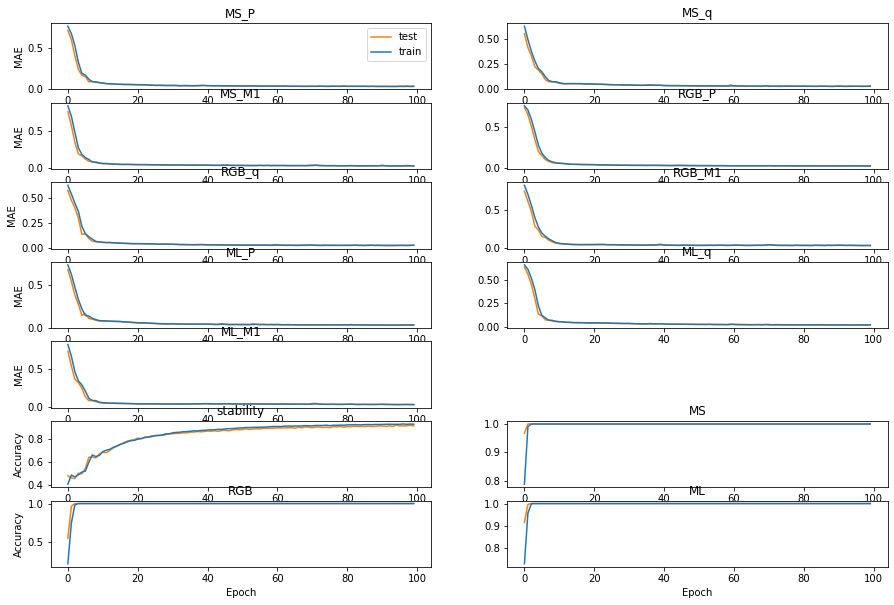

In [8]:
pl.figure(figsize=(15,10))
predictor_pre_interaction.print_score()
predictor_pre_interaction.plot_training_history()

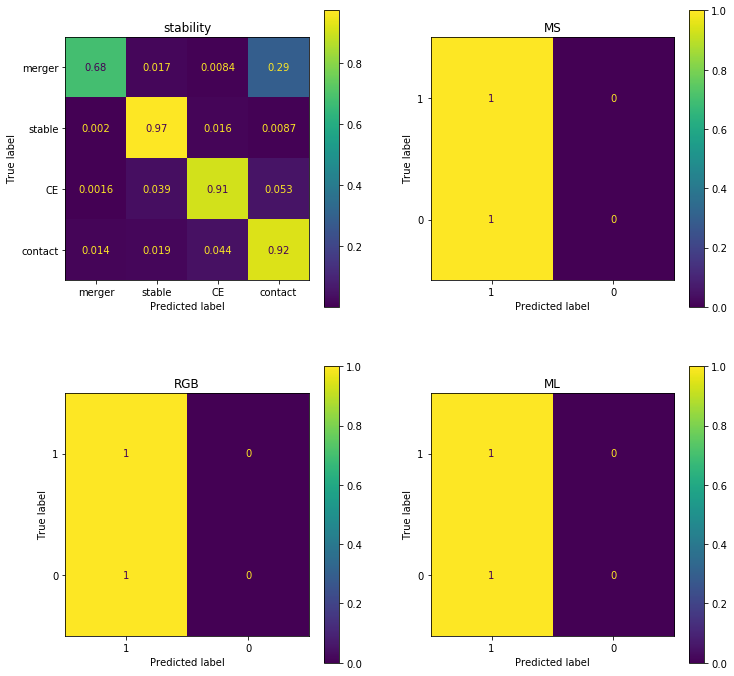

In [9]:
pl.figure(figsize=(12, 12))
predictor_pre_interaction.plot_confusion_matrix()

In [10]:
predictor_pre_interaction.save_model('model_pre_interacton.h5')

## Predict post interaction properties for stable systems

In [11]:
setup = """
features: 
    - M1_init
    - q_init
    - P_init
    - FeH_init
    - stability_limit
regressors:
    HeCoreBurning_P:
        processor: StandardScaler
    HeCoreBurning_q:
        processor: StandardScaler
    HeCoreBurning_M1:
        processor: StandardScaler
    HeShellBurning_P:
        processor: StandardScaler
    HeShellBurning_q:
        processor: StandardScaler
    HeShellBurning_M1:
        processor: StandardScaler
    He-WD_P:
        processor: StandardScaler
    He-WD_q:
        processor: StandardScaler
    He-WD_M1:
        processor: StandardScaler
classifiers:
    - HeCoreBurning
    - HeShellBurning
    - He-WD
model:
   - {'layer':'Dense',   'args':[300], 'kwargs': {'activation':'relu', 'name':'FC_1'} }
   - {'layer':'Dense',   'args':[200], 'kwargs': {'activation':'relu', 'name':'FC_2'} }
   - {'layer':'Dense',   'args':[100], 'kwargs': {'activation':'relu', 'name':'FC_3'} }
   - {'layer':'Dense',   'args':[75],  'kwargs': {'activation':'relu', 'name':'FC_4'} }
   - {'layer':'Dense',   'args':[50],  'kwargs': {'activation':'relu', 'name':'FC_5'} }
   
optimizer: adam
"""
setup = yaml.safe_load(setup)
predictor_stable = predictors.FCPredictor(setup=setup, data=df_stable)

In [12]:
predictor_stable.fit(epochs=100, batch_size=256, reduce_lr=True)

Train on 3432 samples, validate on 858 samples
Epoch 1/100
 - 4s - loss: 9.8759 - HeCoreBurning_P_loss: 0.8724 - HeCoreBurning_q_loss: 0.8635 - HeCoreBurning_M1_loss: 0.8104 - HeShellBurning_P_loss: 0.9179 - HeShellBurning_q_loss: 0.8154 - HeShellBurning_M1_loss: 0.9523 - He-WD_P_loss: 0.9227 - He-WD_q_loss: 0.8660 - He-WD_M1_loss: 0.8627 - HeCoreBurning_loss: 0.6687 - HeShellBurning_loss: 0.6572 - He-WD_loss: 0.6699 - HeCoreBurning_P_mae: 0.8504 - HeCoreBurning_q_mae: 0.6150 - HeCoreBurning_M1_mae: 0.7297 - HeShellBurning_P_mae: 0.8728 - HeShellBurning_q_mae: 0.5903 - HeShellBurning_M1_mae: 0.8123 - He-WD_P_mae: 0.8548 - He-WD_q_mae: 0.8411 - He-WD_M1_mae: 0.9088 - HeCoreBurning_accuracy: 0.5632 - HeShellBurning_accuracy: 0.7112 - He-WD_accuracy: 0.5793 - val_loss: 7.1884 - val_HeCoreBurning_P_loss: 0.6175 - val_HeCoreBurning_q_loss: 0.5157 - val_HeCoreBurning_M1_loss: 0.4987 - val_HeShellBurning_P_loss: 0.7349 - val_HeShellBurning_q_loss: 0.4168 - val_HeShellBurning_M1_loss: 0.7095 -

Epoch 7/100
 - 0s - loss: 2.3267 - HeCoreBurning_P_loss: 0.1485 - HeCoreBurning_q_loss: 0.1680 - HeCoreBurning_M1_loss: 0.1205 - HeShellBurning_P_loss: 0.3458 - HeShellBurning_q_loss: 0.1848 - HeShellBurning_M1_loss: 0.1617 - He-WD_P_loss: 0.2723 - He-WD_q_loss: 0.1685 - He-WD_M1_loss: 0.1899 - HeCoreBurning_loss: 0.2281 - HeShellBurning_loss: 0.2269 - He-WD_loss: 0.1325 - HeCoreBurning_P_mae: 0.2771 - HeCoreBurning_q_mae: 0.2359 - HeCoreBurning_M1_mae: 0.2566 - HeShellBurning_P_mae: 0.4102 - HeShellBurning_q_mae: 0.2526 - HeShellBurning_M1_mae: 0.2869 - He-WD_P_mae: 0.3505 - He-WD_q_mae: 0.2653 - He-WD_M1_mae: 0.2909 - HeCoreBurning_accuracy: 0.9024 - HeShellBurning_accuracy: 0.9038 - He-WD_accuracy: 0.9551 - val_loss: 2.3630 - val_HeCoreBurning_P_loss: 0.1806 - val_HeCoreBurning_q_loss: 0.1485 - val_HeCoreBurning_M1_loss: 0.1194 - val_HeShellBurning_P_loss: 0.3222 - val_HeShellBurning_q_loss: 0.1656 - val_HeShellBurning_M1_loss: 0.1574 - val_He-WD_P_loss: 0.3012 - val_He-WD_q_loss: 0

Epoch 13/100
 - 0s - loss: 1.7686 - HeCoreBurning_P_loss: 0.0908 - HeCoreBurning_q_loss: 0.0877 - HeCoreBurning_M1_loss: 0.0895 - HeShellBurning_P_loss: 0.2914 - HeShellBurning_q_loss: 0.1180 - HeShellBurning_M1_loss: 0.1332 - He-WD_P_loss: 0.1843 - He-WD_q_loss: 0.1211 - He-WD_M1_loss: 0.1398 - HeCoreBurning_loss: 0.2052 - HeShellBurning_loss: 0.2055 - He-WD_loss: 0.1026 - HeCoreBurning_P_mae: 0.2010 - HeCoreBurning_q_mae: 0.1776 - HeCoreBurning_M1_mae: 0.2039 - HeShellBurning_P_mae: 0.3460 - HeShellBurning_q_mae: 0.2127 - HeShellBurning_M1_mae: 0.2513 - He-WD_P_mae: 0.2558 - He-WD_q_mae: 0.1931 - He-WD_M1_mae: 0.2076 - HeCoreBurning_accuracy: 0.9149 - HeShellBurning_accuracy: 0.9123 - He-WD_accuracy: 0.9653 - val_loss: 2.0295 - val_HeCoreBurning_P_loss: 0.1151 - val_HeCoreBurning_q_loss: 0.1494 - val_HeCoreBurning_M1_loss: 0.0970 - val_HeShellBurning_P_loss: 0.2785 - val_HeShellBurning_q_loss: 0.1666 - val_HeShellBurning_M1_loss: 0.1510 - val_He-WD_P_loss: 0.2285 - val_He-WD_q_loss: 

Epoch 19/100
 - 0s - loss: 1.4609 - HeCoreBurning_P_loss: 0.0701 - HeCoreBurning_q_loss: 0.0671 - HeCoreBurning_M1_loss: 0.0651 - HeShellBurning_P_loss: 0.2675 - HeShellBurning_q_loss: 0.0990 - HeShellBurning_M1_loss: 0.1158 - He-WD_P_loss: 0.1296 - He-WD_q_loss: 0.0784 - He-WD_M1_loss: 0.0984 - HeCoreBurning_loss: 0.1887 - HeShellBurning_loss: 0.1895 - He-WD_loss: 0.0818 - HeCoreBurning_P_mae: 0.1635 - HeCoreBurning_q_mae: 0.1486 - HeCoreBurning_M1_mae: 0.1617 - HeShellBurning_P_mae: 0.3046 - HeShellBurning_q_mae: 0.1910 - HeShellBurning_M1_mae: 0.2234 - He-WD_P_mae: 0.1887 - He-WD_q_mae: 0.1366 - He-WD_M1_mae: 0.1462 - HeCoreBurning_accuracy: 0.9210 - HeShellBurning_accuracy: 0.9210 - He-WD_accuracy: 0.9723 - val_loss: 1.6877 - val_HeCoreBurning_P_loss: 0.0970 - val_HeCoreBurning_q_loss: 0.0781 - val_HeCoreBurning_M1_loss: 0.0748 - val_HeShellBurning_P_loss: 0.2662 - val_HeShellBurning_q_loss: 0.1179 - val_HeShellBurning_M1_loss: 0.1177 - val_He-WD_P_loss: 0.1798 - val_He-WD_q_loss: 

Epoch 25/100
 - 0s - loss: 1.3545 - HeCoreBurning_P_loss: 0.0581 - HeCoreBurning_q_loss: 0.0541 - HeCoreBurning_M1_loss: 0.0555 - HeShellBurning_P_loss: 0.2626 - HeShellBurning_q_loss: 0.0880 - HeShellBurning_M1_loss: 0.1108 - He-WD_P_loss: 0.1233 - He-WD_q_loss: 0.0599 - He-WD_M1_loss: 0.0919 - HeCoreBurning_loss: 0.1858 - HeShellBurning_loss: 0.1850 - He-WD_loss: 0.0742 - HeCoreBurning_P_mae: 0.1434 - HeCoreBurning_q_mae: 0.1267 - HeCoreBurning_M1_mae: 0.1376 - HeShellBurning_P_mae: 0.2921 - HeShellBurning_q_mae: 0.1719 - HeShellBurning_M1_mae: 0.2149 - He-WD_P_mae: 0.1822 - He-WD_q_mae: 0.1217 - He-WD_M1_mae: 0.1472 - HeCoreBurning_accuracy: 0.9240 - HeShellBurning_accuracy: 0.9254 - He-WD_accuracy: 0.9720 - val_loss: 1.5500 - val_HeCoreBurning_P_loss: 0.0777 - val_HeCoreBurning_q_loss: 0.0585 - val_HeCoreBurning_M1_loss: 0.0656 - val_HeShellBurning_P_loss: 0.2502 - val_HeShellBurning_q_loss: 0.0970 - val_HeShellBurning_M1_loss: 0.1112 - val_He-WD_P_loss: 0.1598 - val_He-WD_q_loss: 

Epoch 31/100
 - 0s - loss: 1.1387 - HeCoreBurning_P_loss: 0.0396 - HeCoreBurning_q_loss: 0.0430 - HeCoreBurning_M1_loss: 0.0435 - HeShellBurning_P_loss: 0.2480 - HeShellBurning_q_loss: 0.0791 - HeShellBurning_M1_loss: 0.0990 - He-WD_P_loss: 0.0816 - He-WD_q_loss: 0.0396 - He-WD_M1_loss: 0.0661 - HeCoreBurning_loss: 0.1717 - HeShellBurning_loss: 0.1717 - He-WD_loss: 0.0597 - HeCoreBurning_P_mae: 0.1199 - HeCoreBurning_q_mae: 0.1092 - HeCoreBurning_M1_mae: 0.1170 - HeShellBurning_P_mae: 0.2792 - HeShellBurning_q_mae: 0.1641 - HeShellBurning_M1_mae: 0.1950 - He-WD_P_mae: 0.1317 - He-WD_q_mae: 0.0979 - He-WD_M1_mae: 0.1094 - HeCoreBurning_accuracy: 0.9318 - HeShellBurning_accuracy: 0.9304 - He-WD_accuracy: 0.9802 - val_loss: 1.4148 - val_HeCoreBurning_P_loss: 0.0621 - val_HeCoreBurning_q_loss: 0.0531 - val_HeCoreBurning_M1_loss: 0.0529 - val_HeShellBurning_P_loss: 0.2406 - val_HeShellBurning_q_loss: 0.0921 - val_HeShellBurning_M1_loss: 0.1015 - val_He-WD_P_loss: 0.1427 - val_He-WD_q_loss: 

Epoch 37/100
 - 0s - loss: 1.1135 - HeCoreBurning_P_loss: 0.0361 - HeCoreBurning_q_loss: 0.0400 - HeCoreBurning_M1_loss: 0.0401 - HeShellBurning_P_loss: 0.2453 - HeShellBurning_q_loss: 0.0761 - HeShellBurning_M1_loss: 0.0953 - He-WD_P_loss: 0.0746 - He-WD_q_loss: 0.0375 - He-WD_M1_loss: 0.0613 - HeCoreBurning_loss: 0.1700 - HeShellBurning_loss: 0.1701 - He-WD_loss: 0.0548 - HeCoreBurning_P_mae: 0.1157 - HeCoreBurning_q_mae: 0.1055 - HeCoreBurning_M1_mae: 0.1144 - HeShellBurning_P_mae: 0.2740 - HeShellBurning_q_mae: 0.1592 - HeShellBurning_M1_mae: 0.1905 - He-WD_P_mae: 0.1276 - He-WD_q_mae: 0.0971 - He-WD_M1_mae: 0.1090 - HeCoreBurning_accuracy: 0.9309 - HeShellBurning_accuracy: 0.9315 - He-WD_accuracy: 0.9808 - val_loss: 1.3851 - val_HeCoreBurning_P_loss: 0.0584 - val_HeCoreBurning_q_loss: 0.0523 - val_HeCoreBurning_M1_loss: 0.0511 - val_HeShellBurning_P_loss: 0.2384 - val_HeShellBurning_q_loss: 0.0900 - val_HeShellBurning_M1_loss: 0.1002 - val_He-WD_P_loss: 0.1367 - val_He-WD_q_loss: 

Epoch 43/100
 - 1s - loss: 1.0893 - HeCoreBurning_P_loss: 0.0352 - HeCoreBurning_q_loss: 0.0384 - HeCoreBurning_M1_loss: 0.0382 - HeShellBurning_P_loss: 0.2480 - HeShellBurning_q_loss: 0.0751 - HeShellBurning_M1_loss: 0.0934 - He-WD_P_loss: 0.0734 - He-WD_q_loss: 0.0355 - He-WD_M1_loss: 0.0593 - HeCoreBurning_loss: 0.1706 - HeShellBurning_loss: 0.1704 - He-WD_loss: 0.0525 - HeCoreBurning_P_mae: 0.1125 - HeCoreBurning_q_mae: 0.1056 - HeCoreBurning_M1_mae: 0.1113 - HeShellBurning_P_mae: 0.2739 - HeShellBurning_q_mae: 0.1584 - HeShellBurning_M1_mae: 0.1890 - He-WD_P_mae: 0.1262 - He-WD_q_mae: 0.0945 - He-WD_M1_mae: 0.1081 - HeCoreBurning_accuracy: 0.9321 - HeShellBurning_accuracy: 0.9307 - He-WD_accuracy: 0.9805 - val_loss: 1.3555 - val_HeCoreBurning_P_loss: 0.0566 - val_HeCoreBurning_q_loss: 0.0482 - val_HeCoreBurning_M1_loss: 0.0482 - val_HeShellBurning_P_loss: 0.2370 - val_HeShellBurning_q_loss: 0.0871 - val_HeShellBurning_M1_loss: 0.0963 - val_He-WD_P_loss: 0.1381 - val_He-WD_q_loss: 

Epoch 49/100
 - 0s - loss: 1.0597 - HeCoreBurning_P_loss: 0.0319 - HeCoreBurning_q_loss: 0.0382 - HeCoreBurning_M1_loss: 0.0361 - HeShellBurning_P_loss: 0.2406 - HeShellBurning_q_loss: 0.0733 - HeShellBurning_M1_loss: 0.0903 - He-WD_P_loss: 0.0678 - He-WD_q_loss: 0.0337 - He-WD_M1_loss: 0.0560 - HeCoreBurning_loss: 0.1655 - HeShellBurning_loss: 0.1655 - He-WD_loss: 0.0500 - HeCoreBurning_P_mae: 0.1080 - HeCoreBurning_q_mae: 0.1017 - HeCoreBurning_M1_mae: 0.1084 - HeShellBurning_P_mae: 0.2695 - HeShellBurning_q_mae: 0.1554 - HeShellBurning_M1_mae: 0.1835 - He-WD_P_mae: 0.1214 - He-WD_q_mae: 0.0929 - He-WD_M1_mae: 0.1035 - HeCoreBurning_accuracy: 0.9321 - HeShellBurning_accuracy: 0.9318 - He-WD_accuracy: 0.9822 - val_loss: 1.3348 - val_HeCoreBurning_P_loss: 0.0550 - val_HeCoreBurning_q_loss: 0.0424 - val_HeCoreBurning_M1_loss: 0.0461 - val_HeShellBurning_P_loss: 0.2349 - val_HeShellBurning_q_loss: 0.0803 - val_HeShellBurning_M1_loss: 0.0932 - val_He-WD_P_loss: 0.1365 - val_He-WD_q_loss: 

Epoch 55/100
 - 0s - loss: 1.0438 - HeCoreBurning_P_loss: 0.0318 - HeCoreBurning_q_loss: 0.0341 - HeCoreBurning_M1_loss: 0.0345 - HeShellBurning_P_loss: 0.2421 - HeShellBurning_q_loss: 0.0702 - HeShellBurning_M1_loss: 0.0891 - He-WD_P_loss: 0.0708 - He-WD_q_loss: 0.0313 - He-WD_M1_loss: 0.0587 - HeCoreBurning_loss: 0.1667 - HeShellBurning_loss: 0.1665 - He-WD_loss: 0.0523 - HeCoreBurning_P_mae: 0.1063 - HeCoreBurning_q_mae: 0.0994 - HeCoreBurning_M1_mae: 0.1054 - HeShellBurning_P_mae: 0.2711 - HeShellBurning_q_mae: 0.1527 - HeShellBurning_M1_mae: 0.1817 - He-WD_P_mae: 0.1191 - He-WD_q_mae: 0.0879 - He-WD_M1_mae: 0.1040 - HeCoreBurning_accuracy: 0.9327 - HeShellBurning_accuracy: 0.9327 - He-WD_accuracy: 0.9825 - val_loss: 1.3307 - val_HeCoreBurning_P_loss: 0.0569 - val_HeCoreBurning_q_loss: 0.0437 - val_HeCoreBurning_M1_loss: 0.0461 - val_HeShellBurning_P_loss: 0.2390 - val_HeShellBurning_q_loss: 0.0816 - val_HeShellBurning_M1_loss: 0.0952 - val_He-WD_P_loss: 0.1338 - val_He-WD_q_loss: 

Epoch 61/100
 - 0s - loss: 1.0158 - HeCoreBurning_P_loss: 0.0306 - HeCoreBurning_q_loss: 0.0326 - HeCoreBurning_M1_loss: 0.0321 - HeShellBurning_P_loss: 0.2392 - HeShellBurning_q_loss: 0.0672 - HeShellBurning_M1_loss: 0.0857 - He-WD_P_loss: 0.0631 - He-WD_q_loss: 0.0295 - He-WD_M1_loss: 0.0525 - HeCoreBurning_loss: 0.1645 - HeShellBurning_loss: 0.1642 - He-WD_loss: 0.0463 - HeCoreBurning_P_mae: 0.1022 - HeCoreBurning_q_mae: 0.0970 - HeCoreBurning_M1_mae: 0.1028 - HeShellBurning_P_mae: 0.2651 - HeShellBurning_q_mae: 0.1484 - HeShellBurning_M1_mae: 0.1764 - He-WD_P_mae: 0.1158 - He-WD_q_mae: 0.0869 - He-WD_M1_mae: 0.1021 - HeCoreBurning_accuracy: 0.9339 - HeShellBurning_accuracy: 0.9344 - He-WD_accuracy: 0.9851 - val_loss: 1.2962 - val_HeCoreBurning_P_loss: 0.0520 - val_HeCoreBurning_q_loss: 0.0410 - val_HeCoreBurning_M1_loss: 0.0421 - val_HeShellBurning_P_loss: 0.2325 - val_HeShellBurning_q_loss: 0.0777 - val_HeShellBurning_M1_loss: 0.0903 - val_He-WD_P_loss: 0.1310 - val_He-WD_q_loss: 

Epoch 67/100
 - 0s - loss: 0.9977 - HeCoreBurning_P_loss: 0.0281 - HeCoreBurning_q_loss: 0.0312 - HeCoreBurning_M1_loss: 0.0309 - HeShellBurning_P_loss: 0.2389 - HeShellBurning_q_loss: 0.0665 - HeShellBurning_M1_loss: 0.0853 - He-WD_P_loss: 0.0631 - He-WD_q_loss: 0.0276 - He-WD_M1_loss: 0.0530 - HeCoreBurning_loss: 0.1635 - HeShellBurning_loss: 0.1634 - He-WD_loss: 0.0464 - HeCoreBurning_P_mae: 0.0987 - HeCoreBurning_q_mae: 0.0951 - HeCoreBurning_M1_mae: 0.0990 - HeShellBurning_P_mae: 0.2652 - HeShellBurning_q_mae: 0.1493 - HeShellBurning_M1_mae: 0.1779 - He-WD_P_mae: 0.1153 - He-WD_q_mae: 0.0835 - He-WD_M1_mae: 0.1009 - HeCoreBurning_accuracy: 0.9336 - HeShellBurning_accuracy: 0.9330 - He-WD_accuracy: 0.9831 - val_loss: 1.2648 - val_HeCoreBurning_P_loss: 0.0499 - val_HeCoreBurning_q_loss: 0.0382 - val_HeCoreBurning_M1_loss: 0.0393 - val_HeShellBurning_P_loss: 0.2296 - val_HeShellBurning_q_loss: 0.0749 - val_HeShellBurning_M1_loss: 0.0872 - val_He-WD_P_loss: 0.1298 - val_He-WD_q_loss: 

Epoch 73/100
 - 0s - loss: 0.9806 - HeCoreBurning_P_loss: 0.0268 - HeCoreBurning_q_loss: 0.0286 - HeCoreBurning_M1_loss: 0.0287 - HeShellBurning_P_loss: 0.2374 - HeShellBurning_q_loss: 0.0648 - HeShellBurning_M1_loss: 0.0831 - He-WD_P_loss: 0.0582 - He-WD_q_loss: 0.0276 - He-WD_M1_loss: 0.0509 - HeCoreBurning_loss: 0.1635 - HeShellBurning_loss: 0.1635 - He-WD_loss: 0.0444 - HeCoreBurning_P_mae: 0.0975 - HeCoreBurning_q_mae: 0.0916 - HeCoreBurning_M1_mae: 0.0972 - HeShellBurning_P_mae: 0.2631 - HeShellBurning_q_mae: 0.1446 - HeShellBurning_M1_mae: 0.1730 - He-WD_P_mae: 0.1121 - He-WD_q_mae: 0.0827 - He-WD_M1_mae: 0.1008 - HeCoreBurning_accuracy: 0.9327 - HeShellBurning_accuracy: 0.9330 - He-WD_accuracy: 0.9840 - val_loss: 1.2532 - val_HeCoreBurning_P_loss: 0.0509 - val_HeCoreBurning_q_loss: 0.0343 - val_HeCoreBurning_M1_loss: 0.0385 - val_HeShellBurning_P_loss: 0.2307 - val_HeShellBurning_q_loss: 0.0703 - val_HeShellBurning_M1_loss: 0.0868 - val_He-WD_P_loss: 0.1301 - val_He-WD_q_loss: 

Epoch 79/100
 - 0s - loss: 0.9750 - HeCoreBurning_P_loss: 0.0256 - HeCoreBurning_q_loss: 0.0280 - HeCoreBurning_M1_loss: 0.0281 - HeShellBurning_P_loss: 0.2368 - HeShellBurning_q_loss: 0.0623 - HeShellBurning_M1_loss: 0.0814 - He-WD_P_loss: 0.0604 - He-WD_q_loss: 0.0314 - He-WD_M1_loss: 0.0524 - HeCoreBurning_loss: 0.1619 - HeShellBurning_loss: 0.1617 - He-WD_loss: 0.0450 - HeCoreBurning_P_mae: 0.0929 - HeCoreBurning_q_mae: 0.0891 - HeCoreBurning_M1_mae: 0.0992 - HeShellBurning_P_mae: 0.2612 - HeShellBurning_q_mae: 0.1435 - HeShellBurning_M1_mae: 0.1700 - He-WD_P_mae: 0.1086 - He-WD_q_mae: 0.0886 - He-WD_M1_mae: 0.1013 - HeCoreBurning_accuracy: 0.9336 - HeShellBurning_accuracy: 0.9336 - He-WD_accuracy: 0.9854 - val_loss: 1.2389 - val_HeCoreBurning_P_loss: 0.0471 - val_HeCoreBurning_q_loss: 0.0363 - val_HeCoreBurning_M1_loss: 0.0374 - val_HeShellBurning_P_loss: 0.2275 - val_HeShellBurning_q_loss: 0.0718 - val_HeShellBurning_M1_loss: 0.0857 - val_He-WD_P_loss: 0.1231 - val_He-WD_q_loss: 

Epoch 85/100
 - 0s - loss: 0.9379 - HeCoreBurning_P_loss: 0.0232 - HeCoreBurning_q_loss: 0.0252 - HeCoreBurning_M1_loss: 0.0253 - HeShellBurning_P_loss: 0.2379 - HeShellBurning_q_loss: 0.0593 - HeShellBurning_M1_loss: 0.0793 - He-WD_P_loss: 0.0551 - He-WD_q_loss: 0.0237 - He-WD_M1_loss: 0.0495 - HeCoreBurning_loss: 0.1608 - HeShellBurning_loss: 0.1608 - He-WD_loss: 0.0427 - HeCoreBurning_P_mae: 0.0896 - HeCoreBurning_q_mae: 0.0879 - HeCoreBurning_M1_mae: 0.0926 - HeShellBurning_P_mae: 0.2565 - HeShellBurning_q_mae: 0.1398 - HeShellBurning_M1_mae: 0.1664 - He-WD_P_mae: 0.1066 - He-WD_q_mae: 0.0789 - He-WD_M1_mae: 0.0994 - HeCoreBurning_accuracy: 0.9344 - HeShellBurning_accuracy: 0.9350 - He-WD_accuracy: 0.9863 - val_loss: 1.2484 - val_HeCoreBurning_P_loss: 0.0473 - val_HeCoreBurning_q_loss: 0.0369 - val_HeCoreBurning_M1_loss: 0.0364 - val_HeShellBurning_P_loss: 0.2258 - val_HeShellBurning_q_loss: 0.0716 - val_HeShellBurning_M1_loss: 0.0836 - val_He-WD_P_loss: 0.1287 - val_He-WD_q_loss: 

Epoch 91/100
 - 0s - loss: 0.9087 - HeCoreBurning_P_loss: 0.0218 - HeCoreBurning_q_loss: 0.0226 - HeCoreBurning_M1_loss: 0.0228 - HeShellBurning_P_loss: 0.2330 - HeShellBurning_q_loss: 0.0564 - HeShellBurning_M1_loss: 0.0769 - He-WD_P_loss: 0.0527 - He-WD_q_loss: 0.0221 - He-WD_M1_loss: 0.0448 - HeCoreBurning_loss: 0.1584 - HeShellBurning_loss: 0.1581 - He-WD_loss: 0.0397 - HeCoreBurning_P_mae: 0.0860 - HeCoreBurning_q_mae: 0.0834 - HeCoreBurning_M1_mae: 0.0880 - HeShellBurning_P_mae: 0.2561 - HeShellBurning_q_mae: 0.1379 - HeShellBurning_M1_mae: 0.1645 - He-WD_P_mae: 0.1047 - He-WD_q_mae: 0.0752 - He-WD_M1_mae: 0.0945 - HeCoreBurning_accuracy: 0.9371 - HeShellBurning_accuracy: 0.9365 - He-WD_accuracy: 0.9869 - val_loss: 1.2126 - val_HeCoreBurning_P_loss: 0.0469 - val_HeCoreBurning_q_loss: 0.0308 - val_HeCoreBurning_M1_loss: 0.0342 - val_HeShellBurning_P_loss: 0.2272 - val_HeShellBurning_q_loss: 0.0661 - val_HeShellBurning_M1_loss: 0.0825 - val_He-WD_P_loss: 0.1245 - val_He-WD_q_loss: 

Epoch 97/100
 - 0s - loss: 0.8887 - HeCoreBurning_P_loss: 0.0218 - HeCoreBurning_q_loss: 0.0224 - HeCoreBurning_M1_loss: 0.0229 - HeShellBurning_P_loss: 0.2284 - HeShellBurning_q_loss: 0.0553 - HeShellBurning_M1_loss: 0.0756 - He-WD_P_loss: 0.0515 - He-WD_q_loss: 0.0213 - He-WD_M1_loss: 0.0459 - HeCoreBurning_loss: 0.1560 - HeShellBurning_loss: 0.1555 - He-WD_loss: 0.0405 - HeCoreBurning_P_mae: 0.0832 - HeCoreBurning_q_mae: 0.0810 - HeCoreBurning_M1_mae: 0.0864 - HeShellBurning_P_mae: 0.2504 - HeShellBurning_q_mae: 0.1331 - HeShellBurning_M1_mae: 0.1599 - He-WD_P_mae: 0.0998 - He-WD_q_mae: 0.0739 - He-WD_M1_mae: 0.0937 - HeCoreBurning_accuracy: 0.9362 - HeShellBurning_accuracy: 0.9362 - He-WD_accuracy: 0.9869 - val_loss: 1.2090 - val_HeCoreBurning_P_loss: 0.0457 - val_HeCoreBurning_q_loss: 0.0275 - val_HeCoreBurning_M1_loss: 0.0330 - val_HeShellBurning_P_loss: 0.2245 - val_HeShellBurning_q_loss: 0.0628 - val_HeShellBurning_M1_loss: 0.0803 - val_He-WD_P_loss: 0.1257 - val_He-WD_q_loss: 

Training results
target           mean  training score   test score
--------------------------------------------------
HeCoreBurning_P:  586.718       47.026       57.449
HeCoreBurning_q:    0.387        0.041        0.045
HeCoreBurning_M1:    0.392        0.036        0.043
HeShellBurning_P:  517.402      145.102      145.255
HeShellBurning_q:    0.358        0.068        0.073
HeShellBurning_M1:    0.359        0.069        0.071
He-WD_P     :  281.255       36.202       50.370
He-WD_q     :    0.186        0.017        0.024
He-WD_M1    :    0.177        0.019        0.028
HeCoreBurning:  -        93.7%        93.1%
HeShellBurning:  -        93.7%        93.0%
He-WD       :  -        98.8%        95.9%


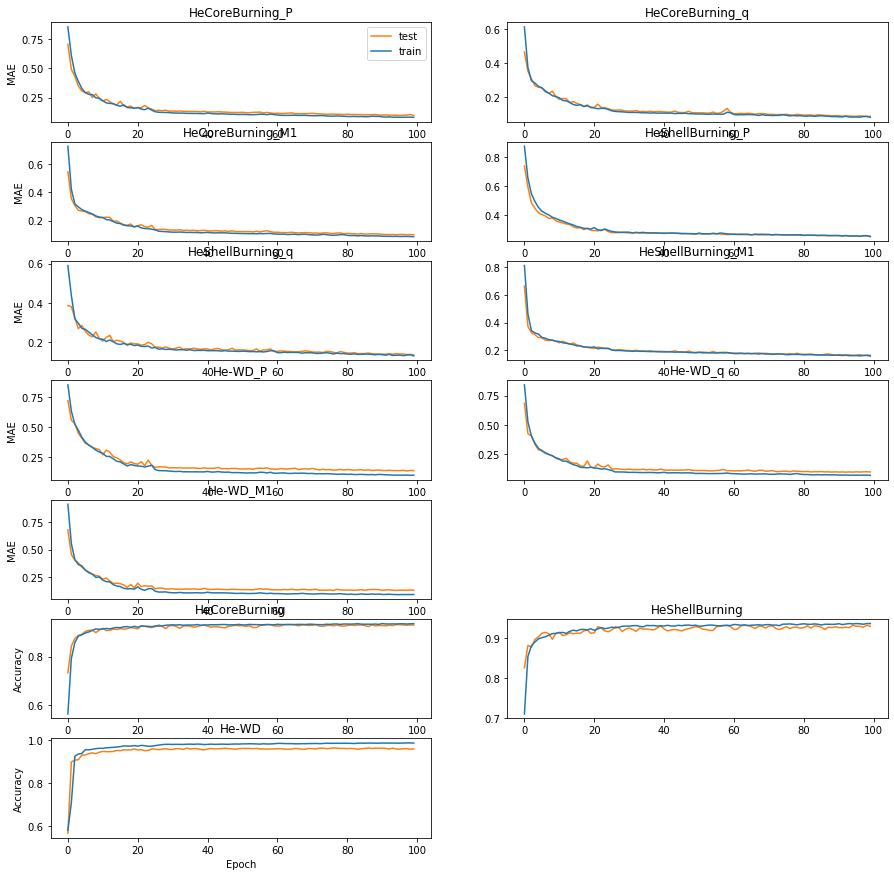

In [13]:
pl.figure(figsize=(15,15))
predictor_stable.print_score()
predictor_stable.plot_training_history()

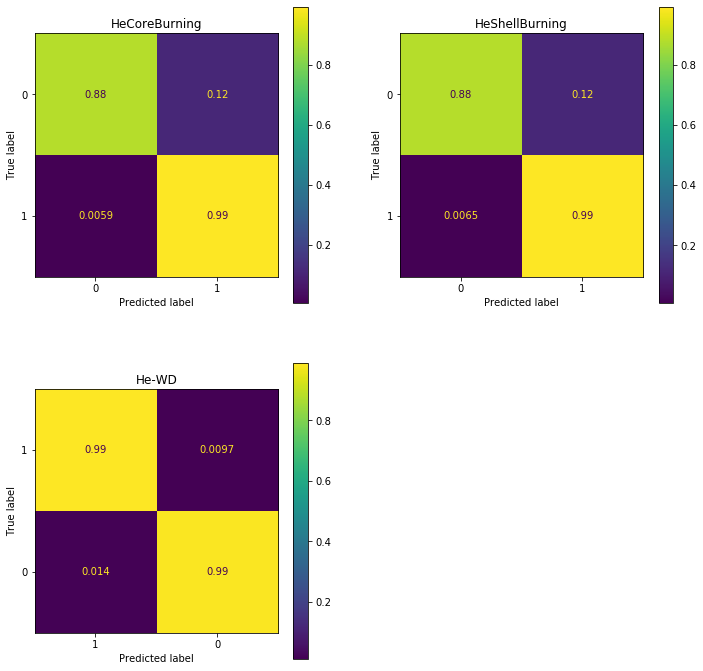

In [14]:
pl.figure(figsize=(12, 12))
predictor_stable.plot_confusion_matrix()

In [15]:
predictor_stable.save_model('model_stable_systems.h5')

/home/joris/Software/anaconda2/envs/py37/lib/python3.7/site-packages/tables/path.py:157: NaturalNameWarning: object name is not a valid Python identifier: 'He-WD_P'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/joris/Software/anaconda2/envs/py37/lib/python3.7/site-packages/tables/path.py:157: NaturalNameWarning: object name is not a valid Python identifier: 'He-WD_q'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/home/joris/Software/anaconda2/envs/py37/lib/python3.7/site-packages/tables/path.py:157: NaturalNameWarning: object name is not a valid Python identifier: 'He-WD_M1'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming 

## Predict properties for unstable systems

Oversample the sdBs

In [16]:
df_ce['He-WD'].value_counts()

1    1583
0     863
Name: He-WD, dtype: int64

In [17]:
setup = """
features: 
    - M1_init
    - q_init
    - P_init
    - FeH_init
    - stability_limit
    - alpha_ce
regressors:
    CE_P:
        processor: StandardScaler
    CE_q:
        processor: StandardScaler
    CE_M1:
        processor: StandardScaler
    HeCoreBurning_P:
        processor: StandardScaler
    HeCoreBurning_q:
        processor: StandardScaler
    HeCoreBurning_M1:
        processor: StandardScaler
    He-WD_P:
        processor: StandardScaler
    He-WD_q:
        processor: StandardScaler
    He-WD_M1:
        processor: StandardScaler
classifiers:
    - HeCoreBurning
model:
   - {'layer':'Dense',   'args':[300], 'kwargs': {'activation':'relu', 'name':'FC_1'} }
   - {'layer':'Dropout', 'args':[0.1], 'kwargs': {'name':'DO_1'} }
   - {'layer':'Dense',   'args':[200], 'kwargs': {'activation':'relu', 'name':'FC_2'} }
   - {'layer':'Dense',   'args':[100], 'kwargs': {'activation':'relu', 'name':'FC_3'} }
   - {'layer':'Dense',   'args':[50],  'kwargs': {'activation':'relu', 'name':'FC_4'} }
   
optimizer: adam
"""
setup = yaml.safe_load(setup)
predictor_ce = predictors.FCPredictor(setup=setup, data=df_ce)

In [18]:
predictor_ce.fit(epochs=100, batch_size=1024, reduce_lr=True)

Train on 1956 samples, validate on 490 samples
Epoch 1/100
 - 4s - loss: 10.2515 - CE_P_loss: 0.9722 - CE_q_loss: 0.9526 - CE_M1_loss: 0.9867 - HeCoreBurning_P_loss: 0.9950 - HeCoreBurning_q_loss: 0.9834 - HeCoreBurning_M1_loss: 0.9937 - He-WD_P_loss: 1.0050 - He-WD_q_loss: 1.0021 - He-WD_M1_loss: 0.9821 - HeCoreBurning_loss: 0.6919 - He-WD_loss: 0.6900 - CE_P_mae: 0.7008 - CE_q_mae: 0.6755 - CE_M1_mae: 0.8471 - HeCoreBurning_P_mae: 0.7578 - HeCoreBurning_q_mae: 0.7096 - HeCoreBurning_M1_mae: 0.8989 - He-WD_P_mae: 0.8267 - He-WD_q_mae: 0.6724 - He-WD_M1_mae: 0.8904 - HeCoreBurning_accuracy: 0.5036 - He-WD_accuracy: 0.6043 - val_loss: 9.6955 - val_CE_P_loss: 0.9337 - val_CE_q_loss: 0.8466 - val_CE_M1_loss: 0.8204 - val_HeCoreBurning_P_loss: 0.9621 - val_HeCoreBurning_q_loss: 0.9397 - val_HeCoreBurning_M1_loss: 0.9455 - val_He-WD_P_loss: 0.9907 - val_He-WD_q_loss: 0.9387 - val_He-WD_M1_loss: 0.9416 - val_HeCoreBurning_loss: 0.6864 - val_He-WD_loss: 0.6902 - val_CE_P_mae: 0.6963 - val_CE_

Epoch 8/100
 - 0s - loss: 5.6857 - CE_P_loss: 0.2332 - CE_q_loss: 0.2870 - CE_M1_loss: 0.2816 - HeCoreBurning_P_loss: 0.4231 - HeCoreBurning_q_loss: 0.7198 - HeCoreBurning_M1_loss: 0.6222 - He-WD_P_loss: 0.8635 - He-WD_q_loss: 0.4142 - He-WD_M1_loss: 0.5930 - HeCoreBurning_loss: 0.5791 - He-WD_loss: 0.6527 - CE_P_mae: 0.2711 - CE_q_mae: 0.3030 - CE_M1_mae: 0.4064 - HeCoreBurning_P_mae: 0.5102 - HeCoreBurning_q_mae: 0.5373 - HeCoreBurning_M1_mae: 0.6568 - He-WD_P_mae: 0.7356 - He-WD_q_mae: 0.4530 - He-WD_M1_mae: 0.6223 - HeCoreBurning_accuracy: 0.7193 - He-WD_accuracy: 0.6518 - val_loss: 5.2133 - val_CE_P_loss: 0.1428 - val_CE_q_loss: 0.1804 - val_CE_M1_loss: 0.2516 - val_HeCoreBurning_P_loss: 0.3367 - val_HeCoreBurning_q_loss: 0.7152 - val_HeCoreBurning_M1_loss: 0.5990 - val_He-WD_P_loss: 0.8540 - val_He-WD_q_loss: 0.3765 - val_He-WD_M1_loss: 0.5818 - val_HeCoreBurning_loss: 0.5453 - val_He-WD_loss: 0.6299 - val_CE_P_mae: 0.2440 - val_CE_q_mae: 0.2503 - val_CE_M1_mae: 0.3838 - val_HeCo

Epoch 15/100
 - 0s - loss: 3.9756 - CE_P_loss: 0.1543 - CE_q_loss: 0.0294 - CE_M1_loss: 0.1214 - HeCoreBurning_P_loss: 0.2254 - HeCoreBurning_q_loss: 0.6052 - HeCoreBurning_M1_loss: 0.5177 - He-WD_P_loss: 0.6994 - He-WD_q_loss: 0.2771 - He-WD_M1_loss: 0.5191 - HeCoreBurning_loss: 0.3859 - He-WD_loss: 0.4330 - CE_P_mae: 0.2063 - CE_q_mae: 0.1348 - CE_M1_mae: 0.2738 - HeCoreBurning_P_mae: 0.3210 - HeCoreBurning_q_mae: 0.4884 - HeCoreBurning_M1_mae: 0.5564 - He-WD_P_mae: 0.6270 - He-WD_q_mae: 0.3402 - He-WD_M1_mae: 0.5583 - HeCoreBurning_accuracy: 0.8441 - He-WD_accuracy: 0.8323 - val_loss: 3.7543 - val_CE_P_loss: 0.0909 - val_CE_q_loss: 0.0170 - val_CE_M1_loss: 0.1129 - val_HeCoreBurning_P_loss: 0.1775 - val_HeCoreBurning_q_loss: 0.6082 - val_HeCoreBurning_M1_loss: 0.4931 - val_He-WD_P_loss: 0.7105 - val_He-WD_q_loss: 0.2678 - val_He-WD_M1_loss: 0.5091 - val_HeCoreBurning_loss: 0.3605 - val_He-WD_loss: 0.4067 - val_CE_P_mae: 0.1920 - val_CE_q_mae: 0.1006 - val_CE_M1_mae: 0.2642 - val_HeC

Epoch 22/100
 - 0s - loss: 3.3144 - CE_P_loss: 0.1214 - CE_q_loss: 0.0205 - CE_M1_loss: 0.0841 - HeCoreBurning_P_loss: 0.1713 - HeCoreBurning_q_loss: 0.5412 - HeCoreBurning_M1_loss: 0.4747 - He-WD_P_loss: 0.5909 - He-WD_q_loss: 0.2320 - He-WD_M1_loss: 0.4681 - HeCoreBurning_loss: 0.2948 - He-WD_loss: 0.3150 - CE_P_mae: 0.1753 - CE_q_mae: 0.1073 - CE_M1_mae: 0.2235 - HeCoreBurning_P_mae: 0.2598 - HeCoreBurning_q_mae: 0.4433 - HeCoreBurning_M1_mae: 0.5189 - He-WD_P_mae: 0.5673 - He-WD_q_mae: 0.2877 - He-WD_M1_mae: 0.5189 - HeCoreBurning_accuracy: 0.8640 - He-WD_accuracy: 0.8696 - val_loss: 3.1960 - val_CE_P_loss: 0.0601 - val_CE_q_loss: 0.0153 - val_CE_M1_loss: 0.0873 - val_HeCoreBurning_P_loss: 0.1372 - val_HeCoreBurning_q_loss: 0.5488 - val_HeCoreBurning_M1_loss: 0.4543 - val_He-WD_P_loss: 0.6114 - val_He-WD_q_loss: 0.2281 - val_He-WD_M1_loss: 0.4692 - val_HeCoreBurning_loss: 0.2794 - val_He-WD_loss: 0.3048 - val_CE_P_mae: 0.1494 - val_CE_q_mae: 0.0913 - val_CE_M1_mae: 0.2196 - val_HeC

Epoch 29/100
 - 0s - loss: 2.9394 - CE_P_loss: 0.1063 - CE_q_loss: 0.0220 - CE_M1_loss: 0.0668 - HeCoreBurning_P_loss: 0.1576 - HeCoreBurning_q_loss: 0.4804 - HeCoreBurning_M1_loss: 0.4343 - He-WD_P_loss: 0.5009 - He-WD_q_loss: 0.2081 - He-WD_M1_loss: 0.4307 - HeCoreBurning_loss: 0.2612 - He-WD_loss: 0.2740 - CE_P_mae: 0.1563 - CE_q_mae: 0.1134 - CE_M1_mae: 0.1978 - HeCoreBurning_P_mae: 0.2434 - HeCoreBurning_q_mae: 0.4117 - HeCoreBurning_M1_mae: 0.4763 - He-WD_P_mae: 0.5172 - He-WD_q_mae: 0.2795 - He-WD_M1_mae: 0.4843 - HeCoreBurning_accuracy: 0.8814 - He-WD_accuracy: 0.8850 - val_loss: 2.8317 - val_CE_P_loss: 0.0534 - val_CE_q_loss: 0.0138 - val_CE_M1_loss: 0.0628 - val_HeCoreBurning_P_loss: 0.1209 - val_HeCoreBurning_q_loss: 0.5119 - val_HeCoreBurning_M1_loss: 0.4187 - val_He-WD_P_loss: 0.5124 - val_He-WD_q_loss: 0.2120 - val_He-WD_M1_loss: 0.4200 - val_HeCoreBurning_loss: 0.2450 - val_He-WD_loss: 0.2608 - val_CE_P_mae: 0.1391 - val_CE_q_mae: 0.0879 - val_CE_M1_mae: 0.1874 - val_HeC

Epoch 36/100
 - 0s - loss: 2.6267 - CE_P_loss: 0.1001 - CE_q_loss: 0.0195 - CE_M1_loss: 0.0586 - HeCoreBurning_P_loss: 0.1496 - HeCoreBurning_q_loss: 0.4390 - HeCoreBurning_M1_loss: 0.3967 - He-WD_P_loss: 0.4210 - He-WD_q_loss: 0.1858 - He-WD_M1_loss: 0.3909 - HeCoreBurning_loss: 0.2339 - He-WD_loss: 0.2395 - CE_P_mae: 0.1443 - CE_q_mae: 0.1057 - CE_M1_mae: 0.1830 - HeCoreBurning_P_mae: 0.2280 - HeCoreBurning_q_mae: 0.3818 - HeCoreBurning_M1_mae: 0.4352 - He-WD_P_mae: 0.4592 - He-WD_q_mae: 0.2503 - He-WD_M1_mae: 0.4446 - HeCoreBurning_accuracy: 0.8993 - He-WD_accuracy: 0.9034 - val_loss: 2.5462 - val_CE_P_loss: 0.0504 - val_CE_q_loss: 0.0147 - val_CE_M1_loss: 0.0532 - val_HeCoreBurning_P_loss: 0.1103 - val_HeCoreBurning_q_loss: 0.4818 - val_HeCoreBurning_M1_loss: 0.3784 - val_He-WD_P_loss: 0.4304 - val_He-WD_q_loss: 0.1914 - val_He-WD_M1_loss: 0.3839 - val_HeCoreBurning_loss: 0.2221 - val_He-WD_loss: 0.2297 - val_CE_P_mae: 0.1325 - val_CE_q_mae: 0.0872 - val_CE_M1_mae: 0.1622 - val_HeC

Epoch 43/100
 - 0s - loss: 2.3247 - CE_P_loss: 0.0932 - CE_q_loss: 0.0174 - CE_M1_loss: 0.0515 - HeCoreBurning_P_loss: 0.1364 - HeCoreBurning_q_loss: 0.3897 - HeCoreBurning_M1_loss: 0.3600 - He-WD_P_loss: 0.3511 - He-WD_q_loss: 0.1606 - He-WD_M1_loss: 0.3533 - HeCoreBurning_loss: 0.2063 - He-WD_loss: 0.2086 - CE_P_mae: 0.1368 - CE_q_mae: 0.0981 - CE_M1_mae: 0.1660 - HeCoreBurning_P_mae: 0.2087 - HeCoreBurning_q_mae: 0.3580 - HeCoreBurning_M1_mae: 0.4005 - He-WD_P_mae: 0.4046 - He-WD_q_mae: 0.2326 - He-WD_M1_mae: 0.4096 - HeCoreBurning_accuracy: 0.9085 - He-WD_accuracy: 0.9162 - val_loss: 2.3767 - val_CE_P_loss: 0.0473 - val_CE_q_loss: 0.0124 - val_CE_M1_loss: 0.0474 - val_HeCoreBurning_P_loss: 0.1012 - val_HeCoreBurning_q_loss: 0.4693 - val_HeCoreBurning_M1_loss: 0.3592 - val_He-WD_P_loss: 0.3735 - val_He-WD_q_loss: 0.1889 - val_He-WD_M1_loss: 0.3595 - val_HeCoreBurning_loss: 0.2077 - val_He-WD_loss: 0.2103 - val_CE_P_mae: 0.1263 - val_CE_q_mae: 0.0767 - val_CE_M1_mae: 0.1515 - val_HeC

Epoch 50/100
 - 0s - loss: 2.1157 - CE_P_loss: 0.0893 - CE_q_loss: 0.0171 - CE_M1_loss: 0.0492 - HeCoreBurning_P_loss: 0.1228 - HeCoreBurning_q_loss: 0.3731 - HeCoreBurning_M1_loss: 0.3244 - He-WD_P_loss: 0.2942 - He-WD_q_loss: 0.1509 - He-WD_M1_loss: 0.3229 - HeCoreBurning_loss: 0.1867 - He-WD_loss: 0.1869 - CE_P_mae: 0.1355 - CE_q_mae: 0.0973 - CE_M1_mae: 0.1582 - HeCoreBurning_P_mae: 0.1948 - HeCoreBurning_q_mae: 0.3425 - HeCoreBurning_M1_mae: 0.3707 - He-WD_P_mae: 0.3617 - He-WD_q_mae: 0.2176 - He-WD_M1_mae: 0.3810 - HeCoreBurning_accuracy: 0.9192 - He-WD_accuracy: 0.9208 - val_loss: 2.1772 - val_CE_P_loss: 0.0442 - val_CE_q_loss: 0.0105 - val_CE_M1_loss: 0.0418 - val_HeCoreBurning_P_loss: 0.0931 - val_HeCoreBurning_q_loss: 0.4424 - val_HeCoreBurning_M1_loss: 0.3341 - val_He-WD_P_loss: 0.3244 - val_He-WD_q_loss: 0.1776 - val_He-WD_M1_loss: 0.3291 - val_HeCoreBurning_loss: 0.1890 - val_He-WD_loss: 0.1910 - val_CE_P_mae: 0.1211 - val_CE_q_mae: 0.0737 - val_CE_M1_mae: 0.1399 - val_HeC

Epoch 57/100
 - 0s - loss: 2.0136 - CE_P_loss: 0.0876 - CE_q_loss: 0.0153 - CE_M1_loss: 0.0443 - HeCoreBurning_P_loss: 0.1165 - HeCoreBurning_q_loss: 0.3559 - HeCoreBurning_M1_loss: 0.3174 - He-WD_P_loss: 0.2704 - He-WD_q_loss: 0.1395 - He-WD_M1_loss: 0.3143 - HeCoreBurning_loss: 0.1761 - He-WD_loss: 0.1767 - CE_P_mae: 0.1295 - CE_q_mae: 0.0948 - CE_M1_mae: 0.1514 - HeCoreBurning_P_mae: 0.1848 - HeCoreBurning_q_mae: 0.3421 - HeCoreBurning_M1_mae: 0.3531 - He-WD_P_mae: 0.3399 - He-WD_q_mae: 0.2144 - He-WD_M1_mae: 0.3662 - HeCoreBurning_accuracy: 0.9289 - He-WD_accuracy: 0.9340 - val_loss: 2.0294 - val_CE_P_loss: 0.0420 - val_CE_q_loss: 0.0107 - val_CE_M1_loss: 0.0401 - val_HeCoreBurning_P_loss: 0.0857 - val_HeCoreBurning_q_loss: 0.4199 - val_HeCoreBurning_M1_loss: 0.3100 - val_He-WD_P_loss: 0.2916 - val_He-WD_q_loss: 0.1660 - val_He-WD_M1_loss: 0.3084 - val_HeCoreBurning_loss: 0.1773 - val_He-WD_loss: 0.1777 - val_CE_P_mae: 0.1159 - val_CE_q_mae: 0.0767 - val_CE_M1_mae: 0.1455 - val_HeC

Epoch 64/100
 - 0s - loss: 1.8359 - CE_P_loss: 0.0850 - CE_q_loss: 0.0156 - CE_M1_loss: 0.0420 - HeCoreBurning_P_loss: 0.1129 - HeCoreBurning_q_loss: 0.3347 - HeCoreBurning_M1_loss: 0.2789 - He-WD_P_loss: 0.2416 - He-WD_q_loss: 0.1249 - He-WD_M1_loss: 0.2791 - HeCoreBurning_loss: 0.1598 - He-WD_loss: 0.1602 - CE_P_mae: 0.1285 - CE_q_mae: 0.0930 - CE_M1_mae: 0.1499 - HeCoreBurning_P_mae: 0.1866 - HeCoreBurning_q_mae: 0.3223 - HeCoreBurning_M1_mae: 0.3272 - He-WD_P_mae: 0.3222 - He-WD_q_mae: 0.1948 - He-WD_M1_mae: 0.3456 - HeCoreBurning_accuracy: 0.9310 - He-WD_accuracy: 0.9310 - val_loss: 1.9629 - val_CE_P_loss: 0.0410 - val_CE_q_loss: 0.0107 - val_CE_M1_loss: 0.0374 - val_HeCoreBurning_P_loss: 0.0801 - val_HeCoreBurning_q_loss: 0.4141 - val_HeCoreBurning_M1_loss: 0.2994 - val_He-WD_P_loss: 0.2768 - val_He-WD_q_loss: 0.1671 - val_He-WD_M1_loss: 0.2973 - val_HeCoreBurning_loss: 0.1693 - val_He-WD_loss: 0.1697 - val_CE_P_mae: 0.1136 - val_CE_q_mae: 0.0756 - val_CE_M1_mae: 0.1279 - val_HeC

Epoch 71/100
 - 0s - loss: 1.7478 - CE_P_loss: 0.0842 - CE_q_loss: 0.0147 - CE_M1_loss: 0.0396 - HeCoreBurning_P_loss: 0.1078 - HeCoreBurning_q_loss: 0.3182 - HeCoreBurning_M1_loss: 0.2697 - He-WD_P_loss: 0.2163 - He-WD_q_loss: 0.1263 - He-WD_M1_loss: 0.2705 - HeCoreBurning_loss: 0.1535 - He-WD_loss: 0.1540 - CE_P_mae: 0.1262 - CE_q_mae: 0.0910 - CE_M1_mae: 0.1468 - HeCoreBurning_P_mae: 0.1781 - HeCoreBurning_q_mae: 0.3109 - HeCoreBurning_M1_mae: 0.3183 - He-WD_P_mae: 0.2965 - He-WD_q_mae: 0.2025 - He-WD_M1_mae: 0.3301 - HeCoreBurning_accuracy: 0.9381 - He-WD_accuracy: 0.9402 - val_loss: 1.8612 - val_CE_P_loss: 0.0397 - val_CE_q_loss: 0.0094 - val_CE_M1_loss: 0.0334 - val_HeCoreBurning_P_loss: 0.0757 - val_HeCoreBurning_q_loss: 0.3920 - val_HeCoreBurning_M1_loss: 0.2851 - val_He-WD_P_loss: 0.2586 - val_He-WD_q_loss: 0.1549 - val_He-WD_M1_loss: 0.2892 - val_HeCoreBurning_loss: 0.1617 - val_He-WD_loss: 0.1615 - val_CE_P_mae: 0.1085 - val_CE_q_mae: 0.0698 - val_CE_M1_mae: 0.1240 - val_HeC

Epoch 78/100
 - 0s - loss: 1.6327 - CE_P_loss: 0.0804 - CE_q_loss: 0.0152 - CE_M1_loss: 0.0390 - HeCoreBurning_P_loss: 0.1027 - HeCoreBurning_q_loss: 0.2834 - HeCoreBurning_M1_loss: 0.2523 - He-WD_P_loss: 0.2022 - He-WD_q_loss: 0.1141 - He-WD_M1_loss: 0.2528 - HeCoreBurning_loss: 0.1436 - He-WD_loss: 0.1442 - CE_P_mae: 0.1230 - CE_q_mae: 0.0907 - CE_M1_mae: 0.1409 - HeCoreBurning_P_mae: 0.1662 - HeCoreBurning_q_mae: 0.2878 - HeCoreBurning_M1_mae: 0.3061 - He-WD_P_mae: 0.2852 - He-WD_q_mae: 0.1830 - He-WD_M1_mae: 0.3111 - HeCoreBurning_accuracy: 0.9427 - He-WD_accuracy: 0.9433 - val_loss: 1.8121 - val_CE_P_loss: 0.0382 - val_CE_q_loss: 0.0093 - val_CE_M1_loss: 0.0322 - val_HeCoreBurning_P_loss: 0.0727 - val_HeCoreBurning_q_loss: 0.3872 - val_HeCoreBurning_M1_loss: 0.2763 - val_He-WD_P_loss: 0.2470 - val_He-WD_q_loss: 0.1587 - val_He-WD_M1_loss: 0.2802 - val_HeCoreBurning_loss: 0.1547 - val_He-WD_loss: 0.1557 - val_CE_P_mae: 0.1073 - val_CE_q_mae: 0.0689 - val_CE_M1_mae: 0.1201 - val_HeC

Epoch 85/100
 - 0s - loss: 1.5235 - CE_P_loss: 0.0800 - CE_q_loss: 0.0144 - CE_M1_loss: 0.0376 - HeCoreBurning_P_loss: 0.0958 - HeCoreBurning_q_loss: 0.2687 - HeCoreBurning_M1_loss: 0.2397 - He-WD_P_loss: 0.1834 - He-WD_q_loss: 0.1018 - He-WD_M1_loss: 0.2355 - HeCoreBurning_loss: 0.1361 - He-WD_loss: 0.1363 - CE_P_mae: 0.1212 - CE_q_mae: 0.0894 - CE_M1_mae: 0.1420 - HeCoreBurning_P_mae: 0.1591 - HeCoreBurning_q_mae: 0.2736 - HeCoreBurning_M1_mae: 0.2953 - He-WD_P_mae: 0.2689 - He-WD_q_mae: 0.1713 - He-WD_M1_mae: 0.2980 - HeCoreBurning_accuracy: 0.9468 - He-WD_accuracy: 0.9463 - val_loss: 1.7151 - val_CE_P_loss: 0.0368 - val_CE_q_loss: 0.0095 - val_CE_M1_loss: 0.0311 - val_HeCoreBurning_P_loss: 0.0703 - val_HeCoreBurning_q_loss: 0.3681 - val_HeCoreBurning_M1_loss: 0.2604 - val_He-WD_P_loss: 0.2357 - val_He-WD_q_loss: 0.1491 - val_He-WD_M1_loss: 0.2618 - val_HeCoreBurning_loss: 0.1461 - val_He-WD_loss: 0.1462 - val_CE_P_mae: 0.1043 - val_CE_q_mae: 0.0693 - val_CE_M1_mae: 0.1178 - val_HeC

Epoch 92/100
 - 0s - loss: 1.4073 - CE_P_loss: 0.0749 - CE_q_loss: 0.0140 - CE_M1_loss: 0.0381 - HeCoreBurning_P_loss: 0.0899 - HeCoreBurning_q_loss: 0.2465 - HeCoreBurning_M1_loss: 0.2161 - He-WD_P_loss: 0.1656 - He-WD_q_loss: 0.0941 - He-WD_M1_loss: 0.2138 - HeCoreBurning_loss: 0.1229 - He-WD_loss: 0.1239 - CE_P_mae: 0.1218 - CE_q_mae: 0.0878 - CE_M1_mae: 0.1401 - HeCoreBurning_P_mae: 0.1570 - HeCoreBurning_q_mae: 0.2616 - HeCoreBurning_M1_mae: 0.2790 - He-WD_P_mae: 0.2534 - He-WD_q_mae: 0.1677 - He-WD_M1_mae: 0.2821 - HeCoreBurning_accuracy: 0.9509 - He-WD_accuracy: 0.9525 - val_loss: 1.7273 - val_CE_P_loss: 0.0357 - val_CE_q_loss: 0.0086 - val_CE_M1_loss: 0.0314 - val_HeCoreBurning_P_loss: 0.0706 - val_HeCoreBurning_q_loss: 0.3754 - val_HeCoreBurning_M1_loss: 0.2607 - val_He-WD_P_loss: 0.2338 - val_He-WD_q_loss: 0.1592 - val_He-WD_M1_loss: 0.2595 - val_HeCoreBurning_loss: 0.1459 - val_He-WD_loss: 0.1463 - val_CE_P_mae: 0.1023 - val_CE_q_mae: 0.0656 - val_CE_M1_mae: 0.1168 - val_HeC

Epoch 99/100
 - 0s - loss: 1.3257 - CE_P_loss: 0.0766 - CE_q_loss: 0.0132 - CE_M1_loss: 0.0369 - HeCoreBurning_P_loss: 0.0884 - HeCoreBurning_q_loss: 0.2283 - HeCoreBurning_M1_loss: 0.2082 - He-WD_P_loss: 0.1537 - He-WD_q_loss: 0.0860 - He-WD_M1_loss: 0.2007 - HeCoreBurning_loss: 0.1150 - He-WD_loss: 0.1152 - CE_P_mae: 0.1236 - CE_q_mae: 0.0861 - CE_M1_mae: 0.1388 - HeCoreBurning_P_mae: 0.1508 - HeCoreBurning_q_mae: 0.2511 - HeCoreBurning_M1_mae: 0.2780 - He-WD_P_mae: 0.2456 - He-WD_q_mae: 0.1576 - He-WD_M1_mae: 0.2722 - HeCoreBurning_accuracy: 0.9530 - He-WD_accuracy: 0.9535 - val_loss: 1.6456 - val_CE_P_loss: 0.0341 - val_CE_q_loss: 0.0094 - val_CE_M1_loss: 0.0292 - val_HeCoreBurning_P_loss: 0.0665 - val_HeCoreBurning_q_loss: 0.3628 - val_HeCoreBurning_M1_loss: 0.2465 - val_He-WD_P_loss: 0.2281 - val_He-WD_q_loss: 0.1499 - val_He-WD_M1_loss: 0.2457 - val_HeCoreBurning_loss: 0.1367 - val_He-WD_loss: 0.1368 - val_CE_P_mae: 0.1005 - val_CE_q_mae: 0.0696 - val_CE_M1_mae: 0.1154 - val_HeC

Training results
target           mean  training score   test score
--------------------------------------------------
CE_P        :  194.680       18.003       17.826
CE_q        :    3.280        0.159        0.164
CE_M1       :    1.282        0.037        0.038
HeCoreBurning_P:  109.433       26.571       31.259
HeCoreBurning_q:    0.986        0.401        0.506
HeCoreBurning_M1:    0.457        0.163        0.193
He-WD_P     :   85.247       18.831       22.755
He-WD_q     :    2.294        0.359        0.467
He-WD_M1    :    0.825        0.163        0.194
HeCoreBurning:  -        96.1%        93.1%
He-WD       :  -        96.4%        93.3%


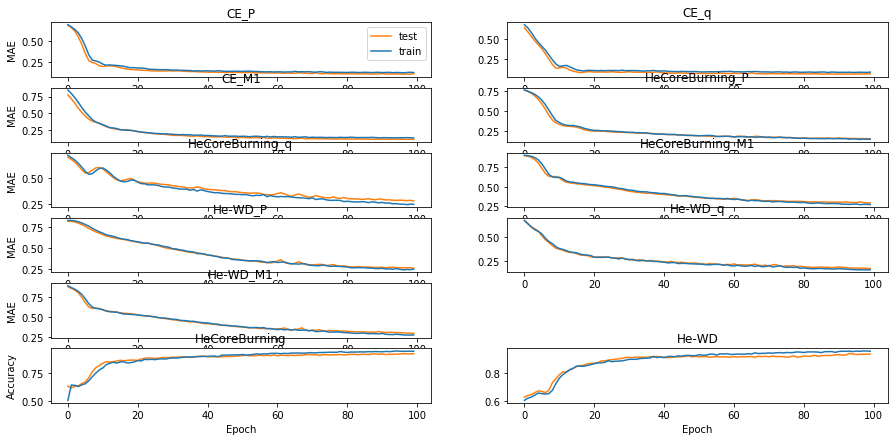

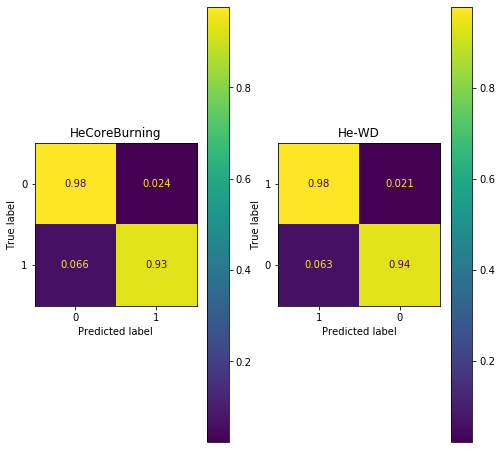

In [19]:
pl.figure(figsize=(15,7))
predictor_ce.print_score()
predictor_ce.plot_training_history()
pl.figure(figsize=(8, 8))
predictor_ce.plot_confusion_matrix()

In [21]:
predictor_ce.save_model('model_ce_systems.h5')